In [57]:
library(nnet)
wholeSet = read.csv("./merged.csv")
set.seed(100)
trainingSize = nrow(wholeSet) * .9
trainingSetIndices = sample(1:nrow(wholeSet), trainingSize)
testingSetIndices = setdiff(rownames(wholeSet),trainingSetIndices)
trainingSet = wholeSet[trainingSetIndices,]
testingSet = wholeSet[testingSetIndices,]
formula = set~iperf+sysbench+ycruncher+pgbench

In [58]:
multinomModel <- multinom(formula, data=trainingSet) # multinom Model
summary (multinomModel) # model summary

# weights:  96 (75 variable)
initial  value 3393.648596 
iter  10 value 3252.384842
iter  20 value 3019.690042
iter  30 value 2666.489705
iter  40 value 2361.358642
iter  50 value 2140.987582
iter  60 value 2017.579178
iter  70 value 1978.773478
iter  80 value 1961.681482
iter  90 value 1957.164971
iter 100 value 1954.546502
final  value 1954.546502 
stopped after 100 iterations


Call:
multinom(formula = formula, data = trainingSet)

Coefficients:
    (Intercept)        iperf   sysbench  ycruncher       pgbench
2    8.22677883 -0.001932659  77.009585 -121.47477  3.533279e-03
3   -1.74209249 -0.009330134 -14.473115   19.49774 -8.944769e-05
4    6.63487514 -0.002584435  12.326388  -39.68620  2.876301e-03
5    0.07870922 -0.002519315  -6.214351  -16.02518  2.744508e-03
6   -6.66645710 -0.010322694 -29.000372   23.08516  1.565923e-03
7   -7.67169855 -0.018930731 -37.491239   39.94644  9.264966e-04
8  -12.19878380 -0.025984568 -41.033390   40.29585  1.544222e-03
9  -12.21209502 -0.027384493 -38.738800   40.08461  1.292436e-03
10  -6.38092832 -0.030528560 -37.753154   40.20062  1.108604e-03
11  -2.89683445 -0.030449419 -37.950107   40.08205  1.094368e-03
12  10.06344762 -0.033495398 -41.344808   45.20902  7.789542e-04
13  -7.06967297 -0.035004965 -33.450451   44.50055  9.924761e-05
14 -12.57215030 -0.035634214 -30.673865   43.89231 -1.128652e-04
15   5.11757073 -0.03

In [59]:
predicted_scores <- predict (multinomModel, testingSet, "probs")
predicted_scores

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
8,5.412659e-01,6.067746e-04,4.421182e-01,2.162643e-04,6.412560e-05,1.263109e-03,0.0025503919,5.875712e-05,0.0002543976,0.0004485310,0.0005568785,2.000080e-04,3.563047e-03,5.474058e-03,1.359480e-03,5.229159e-09
14,5.001555e-04,6.827874e-01,3.156932e-04,2.193021e-01,8.704937e-02,8.579388e-03,0.0006152133,2.674489e-04,0.0002627082,0.0001405658,0.0001628528,1.104763e-05,3.961486e-06,1.752449e-06,4.179067e-07,2.647261e-12
40,1.248987e-01,1.145435e-09,6.580301e-01,8.594170e-07,2.275016e-06,2.032544e-03,0.0225310164,5.059616e-04,0.0022451305,0.0042557217,0.0052816045,3.382273e-03,6.008672e-02,8.915559e-02,2.759105e-02,5.306867e-07
44,5.519941e-02,9.097898e-10,4.402370e-01,4.208791e-07,9.502694e-07,1.159152e-03,0.0202566418,6.386748e-04,0.0031737979,0.0073625325,0.0091042655,6.916032e-03,1.472748e-01,2.340160e-01,7.465897e-02,1.326969e-06
50,1.539562e-01,1.029478e-09,6.961570e-01,8.061790e-07,2.158418e-06,1.852174e-03,0.0186424021,3.529854e-04,0.0015599125,0.0028451649,0.0035414789,2.211982e-03,4.031579e-02,6.013868e-02,1.842283e-02,3.511814e-07
64,2.382944e-06,4.409807e-01,3.366031e-06,3.478462e-01,2.041706e-01,5.591252e-03,0.0002151509,5.767184e-04,0.0003294599,0.0001315276,0.0001458729,6.190575e-06,4.655069e-07,1.259257e-07,3.091254e-08,3.079801e-13
74,3.769621e-05,1.770132e-01,4.256963e-05,4.433709e-01,3.543236e-01,2.157368e-02,0.0009909934,1.216701e-03,0.0007741644,0.0003007494,0.0003372478,1.597287e-05,1.811614e-06,5.508074e-07,1.321384e-07,1.511393e-12
96,9.406390e-02,1.787986e-02,1.388719e-01,1.363921e-01,1.229301e-01,2.741428e-01,0.1050090421,1.943896e-02,0.0297438732,0.0230592053,0.0271256536,3.717663e-03,4.251447e-03,2.683091e-03,6.904299e-04,7.271187e-09
103,1.884911e-05,3.859990e-03,5.916972e-05,2.665694e-01,5.738644e-01,1.103536e-01,0.0084869467,1.854649e-02,0.0101372496,0.0037388740,0.0041305122,2.143645e-04,1.517569e-05,3.926227e-06,1.034106e-06,2.579198e-11
109,5.710828e-06,4.103954e-02,1.500483e-05,4.052212e-01,4.987689e-01,3.869551e-02,0.0022829953,7.009084e-03,0.0037876174,0.0014698436,0.0016211295,7.692095e-05,4.922231e-06,1.250581e-06,3.258446e-07,5.640238e-12


In [60]:
predicted_class <- predict (multinomModel, testingSet)
table(predicted_class, testingSet$set)

               
predicted_class  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16
             1   1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
             2   0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0
             3   0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0
             4   0  0  0  1  0  0  0  0  1  0  0  0  0  0  0  0
             5   0  0  0  0  2  2  0  0  0  0  0  0  0  0  0  0
             6   0  0  0  1  1  5  2  0  0  1  1  0  0  0  0  0
             7   0  0  0  0  0  3  1  1  2  1  2  1  0  0  0  0
             8   0  0  0  0  0  0  1  3  1  0  0  1  0  0  0  0
             9   0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0
             10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
             11  0  0  0  0  0  0  1  0  4  5  3  3  3  1  0  0
             12  0  0  0  0  0  0  0  2  0  3  2  4  4  1  0  0
             13  0  0  0  0  0  0  0  0  0  1  2  1  2  1  8  3
             14  0  0  0  0  0  0  0  0  0  0  0  0  1  2  5  0
             15  0  0  0

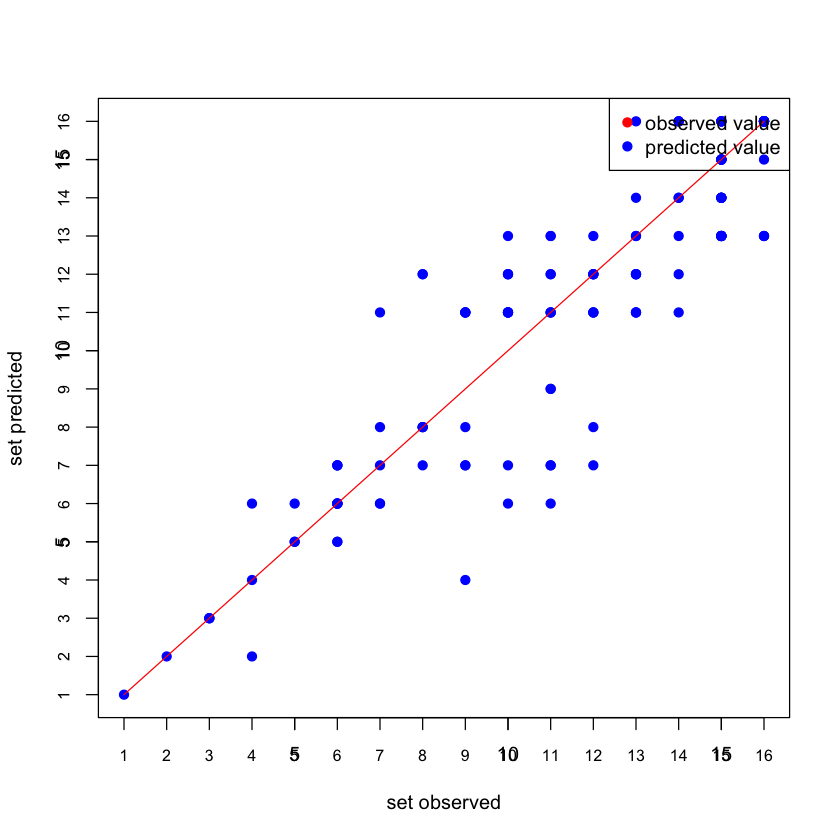

In [61]:
plot(x = testingSet$set , y = predicted_class,col="blue",pch=19,xlab="set observed",ylab="set predicted")
axis(1,1:16,1:16,cex.axis=0.8)
axis(2,1:16,1:16,cex.axis=0.8)
par(new=TRUE)
lines(x = range(1:16) , y = range(1:16),col="red")
legend("topright",legend=c("observed value","predicted value"),pch=19, col=c("red","blue"))

In [63]:
print("correct prediction")
mean(as.character(predicted_class) == as.character(testingSet$set))

[1] "correct prediction"


[1] 0.3676471